# 1. Pandas

Dataset Exploration: Download Gasprices.csv Click here to download Data File1. 

This dataset contains information about the sales of gas stations across a city along with other attributes. You will analyze this dataset using pandas library and plot some interesting information using matplotlib library.


– Load the data using pandas

– Summarize each NUMERIC field in the data, i.e. mean, average etc.

– Group data by the field ’Name’.

∗ Find the average price,average income and average number of pumps for each group.

∗ Use a boxplot that visualizes the statistical information about (price, pumps, gasoline).

∗ Use the Price and Income features in order to plot a prediction line similar to the first exercise. 

Normalize the Income (implement this yourself) and plot the line again. Comment on the different of the two plots.


In [1]:
#dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#load data using pandas 
path = "/content/drive/My Drive/GasPrices.csv"

data = pd.read_csv(path,header=0, index_col=0, parse_dates=True)

In [2]:
#view of the dataset
data.head()

,ID,Name,Price,Pumps,Interior,Restaurant,CarWash,Highway,Intersection,Stoplight,IntersectionStoplight,Gasolines,Competitors,Zipcode,Address,Income,Brand
1,1,Shell,1.79,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3201 N Lamar Blvd,12786,Shell
2,2,Valero,1.83,4,Y,N,N,N,Y,N,Intersection,3,N,78705,3515 N Lamar Blvd,12786,Other
3,3,7-Eleven,1.88,4,Y,N,N,N,Y,Y,Both,3,Y,78751,5101 N Lamar Blvd,41279,Other
4,4,Texaco,1.88,4,Y,N,Y,N,Y,Y,Both,4,Y,78751,5301 N Lamar Blvd,41279,Chevron-Texaco
5,5,Shell,1.84,6,Y,N,N,N,Y,Y,Both,3,N,78751,5630 N Lamar Blvd,41279,Shell


Summarize each NUMERIC field in the data, i.e. mean, average etc.

In [3]:
#summary of the dataset
data.describe()

,ID,Price,Pumps,Gasolines,Zipcode,Income
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,51.000000,1.864257,6.950495,3.465347,78730.782178,56727.217822
std,29.300171,0.081515,3.925242,0.557931,22.054298,25868.359804
min,1.000000,1.730000,2.000000,1.000000,78701.000000,12786.000000
25%,26.000000,1.790000,4.000000,3.000000,78704.000000,37690.000000
50%,51.000000,1.850000,6.000000,3.000000,78731.000000,52306.000000
75%,76.000000,1.920000,8.000000,4.000000,78752.000000,70095.000000
max,101.000000,2.090000,24.000000,4.000000,78759.000000,128556.000000


The describe method give a very generic summary description of the data at all numerical values thereby providing mean and standard deviation of non relevant columns (such as ID, Zipcode, etc.)


Below we will describe data within groups or categories

In [4]:
#Grouping by NAME
GroupName = data.groupby(['Name'])
GroupName.describe()

ID             ...    Income          
                        count       mean  ...       75%       max
Name                                      ...                    
7-Eleven                  9.0  42.111111  ...  81903.00   87306.0
Around the Corner Store   1.0  87.000000  ...  63750.00   63750.0
Chevron                  11.0  55.000000  ...  79315.00  128556.0
Citgo                     4.0  44.000000  ...  56108.50   60856.0
Conoco                    2.0  42.500000  ...  44010.75   44476.0
Costco                    1.0  93.000000  ...  70095.00   70095.0
Double R Grocery          1.0  23.000000  ...  37690.00   37690.0
East 1st Grocery          1.0  44.000000  ...  37690.00   37690.0
Exxon                    12.0  56.000000  ...  65336.25   79315.0
Gulf                      7.0  34.428571  ...  57691.00   87306.0
HEB Fuel                  2.0  32.000000  ...  39759.25   42615.0
Kool Corner               1.0  30.000000  ...  42615.00   42615.0
Lamar Corner Store        1.0   8.000000  ...  37396.00   37396.0
Major Brand Gas           1.0  59.000000  ...  60856.00   60856.0
Mobil                     2.0  52.000000  ...  49883.25   52306.0
Phillips 66               2.0  51.000000  ...  70849.75   81903.0
Shell                    29.0  48.758621  ...  79315.00  128556.0
Signature Fuels           2.0  86.500000  ...  65647.75   70095.0
Texaco                    5.0  68.200000  ...  81903.00  128556.0
Valero                    7.0  64.428571  ...  61200.50   70095.0

[20 rows x 48 columns]

Above are summary statistics at each location. Here we can determine key info such as the average price of gasoline per location, quantity sold, income, number of pumps, etc

Let's find the average price,average income and average number of pumps for each group.

In [5]:
GroupName[['Price', 'Income', 'Pumps']].mean()

,Price,Income,Pumps
Name,,,
7-Eleven,1.887778,53432.333333,4.666667
Around the Corner Store,1.940000,63750.000000,2.000000
Chevron,1.871818,61754.636364,8.727273
Citgo,1.835000,49387.000000,4.000000
Conoco,1.890000,43545.500000,4.000000
Costco,1.730000,70095.000000,12.000000
Double R Grocery,1.790000,37690.000000,4.000000
East 1st Grocery,1.770000,37690.000000,4.000000
Exxon,1.855000,52344.333333,11.500000


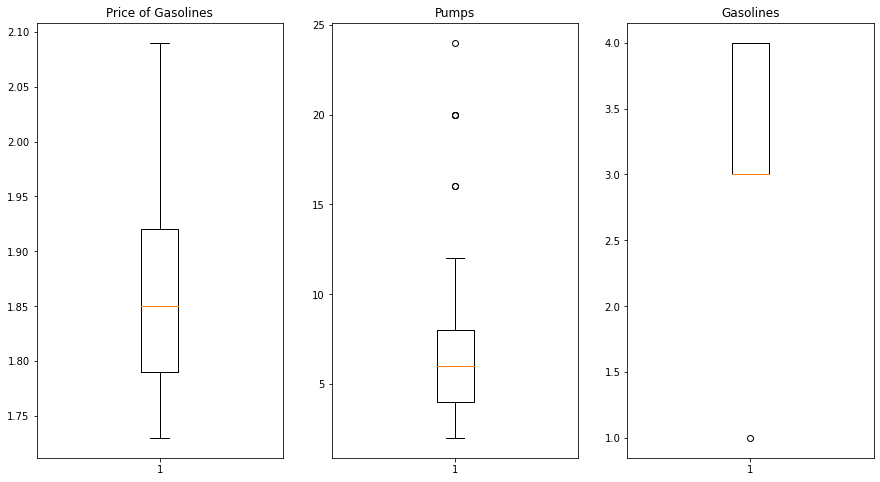

In [6]:
#boxplot that visualizes the statistical information about (price, pumps, gasoline) at locations
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams['figure.figsize'] = fig_size

f, axarr = plt.subplots(1,3)
axarr[0].boxplot(data['Price'])
axarr[0].set_title('Price of Gasolines')
axarr[1].boxplot(data['Pumps'])
axarr[1].set_title('Pumps')
axarr[2].boxplot(data['Gasolines'])
axarr[2].set_title('Gasolines')
plt.show()


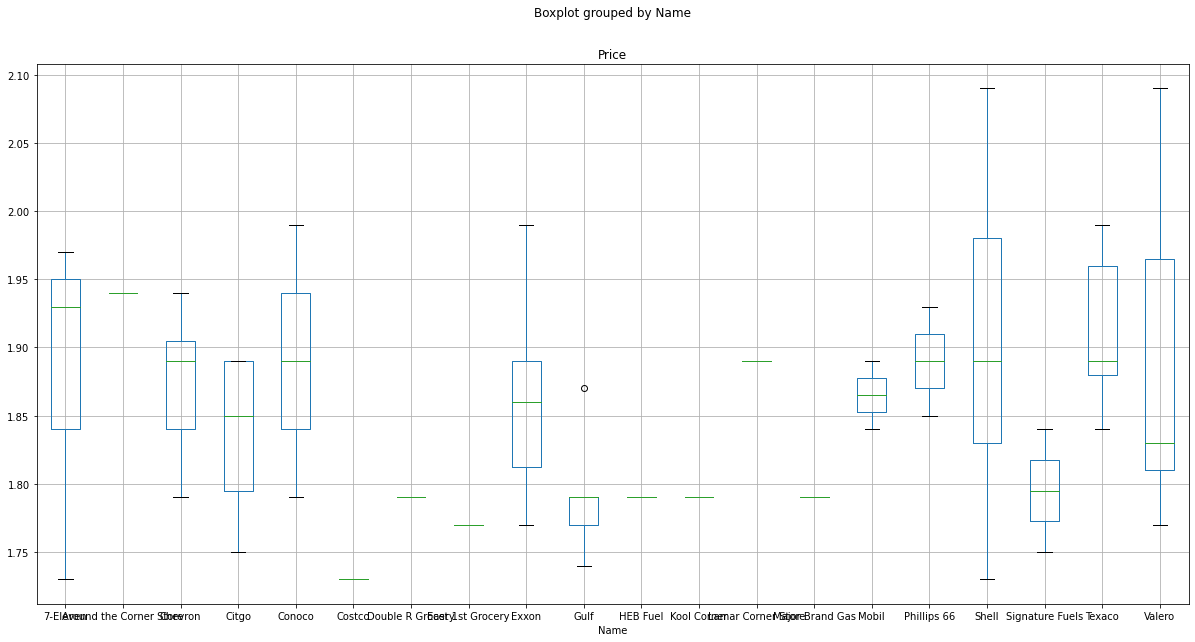

In [7]:
#box plot of prices grouped by name or location 
boxplot_price = data.boxplot(column='Price', by='Name', figsize=(20,10))

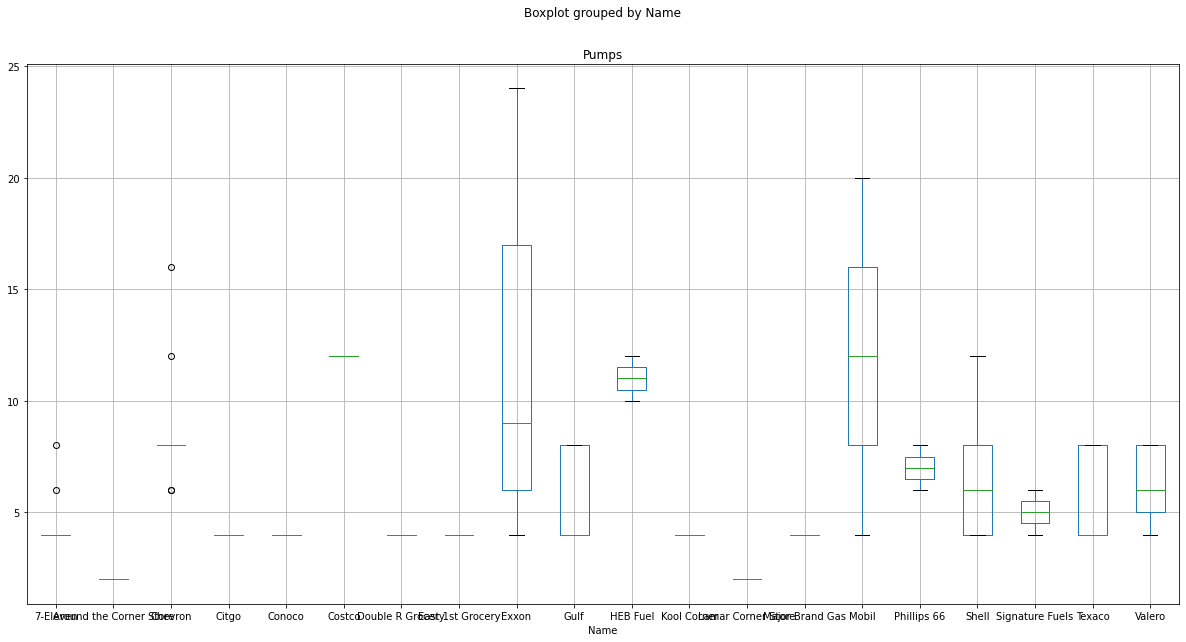

In [8]:
#box plot of pumps grouped by name or location 
boxplot_pumps = data.boxplot(column='Pumps', by='Name', figsize=(20,10))

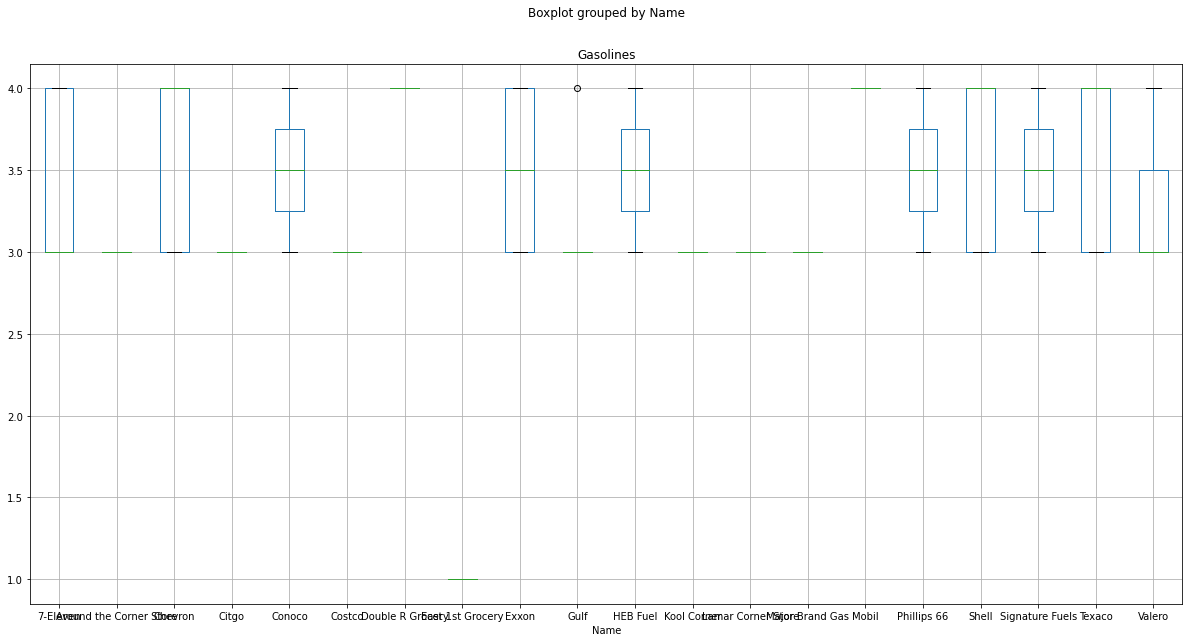

In [9]:
#box plot of Gasolines grouped by name or location 
boxplot_Gas = data.boxplot(column='Gasolines', by='Name', figsize=(20,10))

Use the Price and Income features in order to plot a prediction line similar to the first exercise.

In [10]:
#get Price and Income values
P_I = data[['Price', 'Income']].sort_values(by='Price')
P_I

,Price,Income
93,1.73,70095
20,1.73,54526
16,1.73,54526
35,1.74,54526
21,1.75,54526
...,...,...
99,1.99,44476
86,1.99,63750
71,2.00,128556
78,2.09,52306


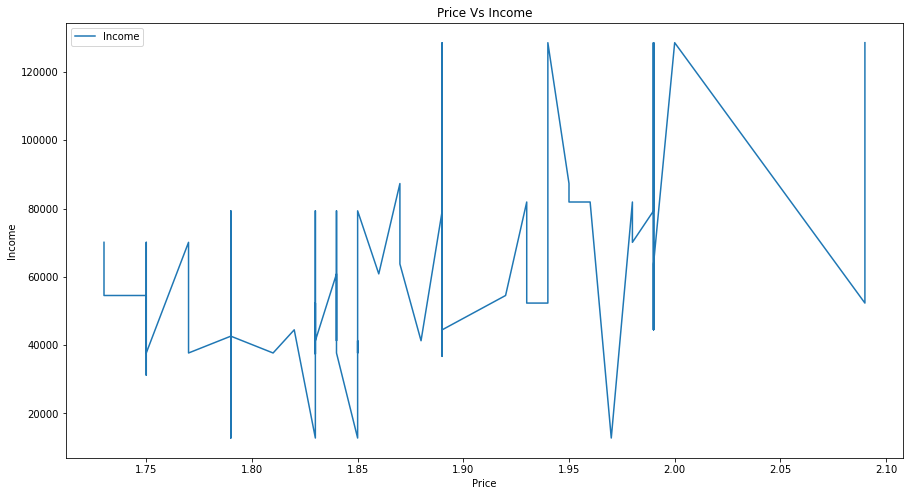

In [11]:
#plot price vs income data
P_I.plot.line(x='Price', y='Income')
plt.title("Price Vs Income")
plt.xlabel("Price")
plt.ylabel("Income")
plt.show()

Apply Simple Linear Regression Model on Price and Income data

In [12]:
#function to learn simple linear regression 
def learn_simple_linreg(data):
  x = data['Price']
  y = data['Income']

  #get mean values
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  #compute b0,b1
  b1 = sum((x-x_mean)*(y-y_mean))/sum((x-x_mean)**2)
  b0 = y_mean - b1*x_mean

  return b1,b0

In [13]:
#function to predict income given price
def predict_simple_linreg(data):
  x = data['Price']
  #compute b0 and b1
  b1, b0 = learn_simple_linreg(data)

  #make prediction
  y_pred = b0 + b1*x

  return y_pred

In [14]:
#Now let's predict income given prices
Income_pred = predict_simple_linreg(P_I)

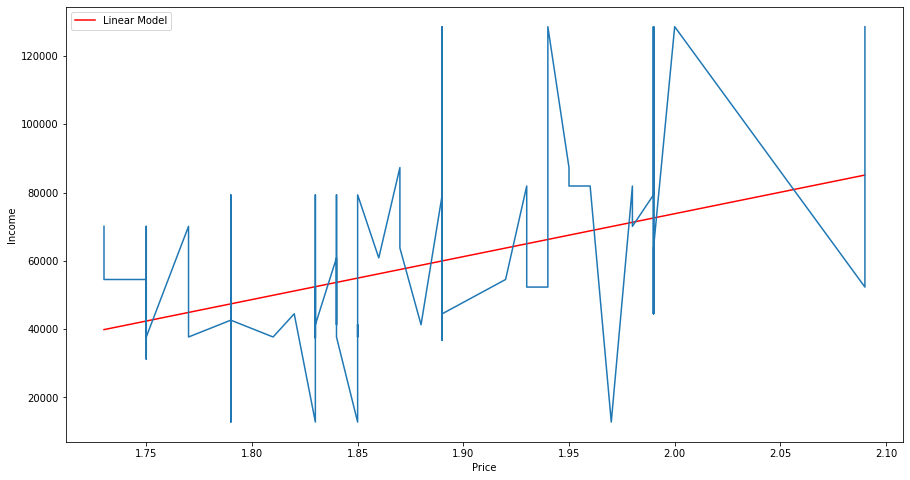

In [15]:
#plot the prediction line-->linear model
plt.plot(P_I['Price'], Income_pred, color = 'red', label = 'Linear Model')
plt.plot(P_I['Price'], P_I['Income'])
plt.xlabel("Price")
plt.ylabel("Income")
plt.legend()
plt.show()


Normalize the Income (implement this yourself) and plot the line again.

In [16]:
#function to learn a linear regression with normalized income
def learn_simple_linreg_normalized(data):
  x = data['Price']
  #normalized y values
  y = (data['Income'] - data['Income'].mean())/(data['Income'].max() - data['Income'].min())

  #get mean of x and y
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  #compute b1 and b0
  b1 = sum((x-x_mean)*(y-y_mean))/sum((x-x_mean)**2)
  b0 = y_mean - b1*x_mean

  return b1, b0

In [17]:
#prediction function 
def pred_simple_linreg_normalized(data):
  x = data['Price']
  #get b1 and b0
  b1, b0 = learn_simple_linreg_normalized(data)
  #make prediction 
  y_pred_norm = b0 + b1*x

  return y_pred_norm

In [18]:
#predicted Normalized Income
Income_hat_Norm = pred_simple_linreg_normalized(P_I)

#Original Normalized Income
Income_Norm = (P_I['Income'] - P_I['Income'].mean()) / (P_I['Income'].max() - P_I['Income'].min())

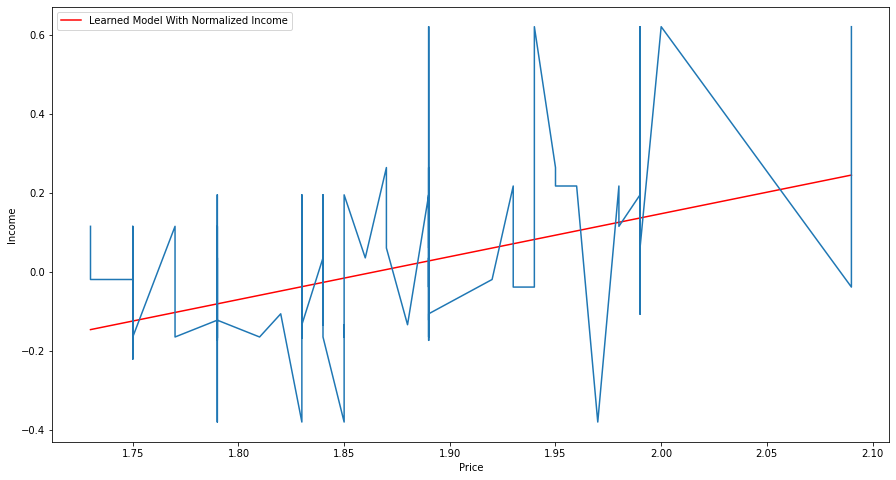

In [19]:
#plot of the graph
plt.plot(P_I['Price'],Income_hat_Norm, color = "red", label ='Learned Model With Normalized Income')
plt.plot(P_I['Price'],Income_Norm)
plt.xlabel("Price")
plt.ylabel("Income")
plt.legend()
plt.show()


# Linear Regression via Normal Equations

Let's try to predict income of a gas station based on the following few features: 


1. Price: The Price is linked to the Income. 
It can be the case that the higher the price, the higher is the Income or could also be, that the higher the price, the less customers the stations will have and therefore the lesser the income. So, Price plays a cruacial role in the prediction for Income
    

2. Pumps: The number of pumps affect the Income as the more the number of pumps, maybe the more customers the station can attend to and this increasing the income.
    

3. Restaurant: Restaurant affect the income of the station.  The availabilty of a restaurant could mean more customers stopping by for refreshments and beverages. This can thus increase the income. Additionally, the income of the restaurant can also contribute the income of the gas station.
    

4. Car Wash: If a gas station has a car wash, it is more likely to have more customers as some people can only come for car wash and therefore, the income for the car wash contributes to the overall income of the gas station.
    

5. Highway: If the gas station is on a highway, it is likely that the income will be affected based on the location. The income may be less or more due to the location of the gas station being on the highway or not.
    

6. Intersection: If there is an intersection of the road, customers may be likely to come to the station as there will be drivers coming from different places.
        

7. Gasolines: The number of gasolines available will likely affect the income. The more the types of gasolines that a gas station can sell, the more likely they are to have more customers.
         

8. Competitors: If a gas station has no competitors, then all the customers will go to that gas station and this the income may be increase.

In [20]:
#Beause we only want to use Price, Pumps, Restaurant, Car Wash, Highway, Intersection, Gasolines and Competitors, to predict income at a gas station we need to select only these columns from the data.
#data.head()
features = data[['Price', 'Pumps', 'Restaurant', 'CarWash', 'Highway', 'Intersection', 'Gasolines', 'Competitors']]
features.head()

,Price,Pumps,Restaurant,CarWash,Highway,Intersection,Gasolines,Competitors
1,1.79,4,N,N,N,Y,3,N
2,1.83,4,N,N,N,Y,3,N
3,1.88,4,N,N,N,Y,3,Y
4,1.88,4,N,Y,N,Y,4,Y
5,1.84,6,N,N,N,Y,3,N


In [21]:
import pandas as pd

#Let's turn all categorical values (Y,N) in columns Restaurant, CarWash, Highway, Intersection and Competitors into 1 for Y and 0 for N
for i in range(features.shape[1]):
  if features.dtypes[i] == 'object' :
    features.iloc[:,i] = pd.Categorical(features.iloc[:,i]).codes

features.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Price,Pumps,Restaurant,CarWash,Highway,Intersection,Gasolines,Competitors
1,1.79,4,0,0,0,1,3,0
2,1.83,4,0,0,0,1,3,0
3,1.88,4,0,0,0,1,3,1
4,1.88,4,0,1,0,1,4,1
5,1.84,6,0,0,0,1,3,0


In [22]:
#Let's define our target variable and normalize it
targets = (data['Income'] - data['Income'].mean())/(data['Income'].max() - data['Income'].min())

targets.head()

1   -0.379556
2   -0.379556
3   -0.133439
4   -0.133439
5   -0.133439
Name: Income, dtype: float64

Get train data (80% training and 20% test)

In [23]:
#function to make the split
def split_train_test(dataset, size):
  trainSet = dataset.sample(frac=size)
  testSet = dataset.drop(trainSet.index)
  return trainSet, testSet

In [24]:
#split data
x_train, x_test = split_train_test(features,0.8)
y_train, y_test = split_train_test(targets,0.8)

x_train.shape

(81, 8)

## Implement learn-linreg-NormEq algorithm and learn a parameter vector β using Xtrain set.

The following function learns a normal equation with these parameters:

- x_train data
- y_train data

We learn values of Beta using 3 methods:
- Gaussian elimination
- Cholesky decomposition
- QR decomposition

In [25]:
#function to learn linreg with normal equation
def learn_linreg_NormEq(x_data, y_data, method):
  xT = np.transpose(x_data)
  yT = y_data
  
  #compute matrix A and matrix b
  mat_A = np.matmul(xT, x_data)
  mat_b = np.matmul(xT, y_data)

  #Methodes
  #Gaussian Elimanation (system of linear equation)
  if method == 1:
    B = SLE_Solve_Gaussian(mat_A, mat_b)
  
  #Cholesky Decomposition 
  if method == 2:
    B = SLE_Solve_Cholesky(mat_A, mat_b)

  #QR Decomposition
  if method == 3:
    B = SLE_Solve_QR(mat_A, mat_b)
  
  return B

### Gaussian Elimination Method

Write A and b in an augmented Matrix {A|b} and perform these three operations:  

- Swap rows
- Add one row onto another
- Multiply every factor of one row with a constant

To get a triangular matrix, subsequently eliminate one variable from the system of equations until you have a matrix like this:

__Algorithm for Gaussian Elimination__:

For each column:

+ Search for maximum in this column.
+  Swap maximum row with current row
+ Make all rows below this one 0 in current column
+ Solve equation Ax=b for an upper triangular matrix A

In [26]:
#function for Gaussian elimination 
def SLE_Solve_Gaussian(mat_A,mat_b):
  #get augmented matrix
  aug_A = np.hstack((mat_A, np.reshape(mat_b, (mat_b.shape[0],1))))
  #length of aug_A
  len_aug_A = len(aug_A)

  for j in range(0, len_aug_A):
    #search maximum in this column
    maxElement = mat_A[j][j]
    maxRow = j

    for i in range(j+1, len_aug_A):
      #get new maximum 
      if aug_A[i][j] > maxElement:
        maxElement = aug_A[i][j]
        maxRow = i

    #swap max row with current row
    for k in range(j, len_aug_A+1):
      temp = aug_A[maxRow][k]
      aug_A[maxRow][k] = aug_A[j][k]
      aug_A[j][k] = temp

    #turn rows below this row to 0 in current col
    for m in range(j+1, len_aug_A):
      c = -aug_A[m][j]/aug_A[j][j]
      for p in range (j, len_aug_A+1):
        if j == p:
          aug_A[m][p] = 0
        else: 
          aug_A[m][p] += c * aug_A[j][p]
    
    #solve equation Ax = b for upper triangular matrix A
    beta = [0 for i in range(len_aug_A)] #start with a beta = 0
    
    for i in range(len_aug_A-1, -1, -1):
      beta[i] = aug_A[i][len_aug_A]/ aug_A[i][i]
      for k in range(i-1, -1, -1):
        aug_A[k][len_aug_A] -= aug_A[k][i] * beta[i]
    return beta

## Cholesky Decomposition

The Cholesky decomposition of a Hermitian positive-definite matrix A is a decomposition of the form

𝐴=𝐿𝐿∗ 

where L is a lower triangular matrix with real and positive diagonal entries, and L* denotes the conjugate transpose of L.

The Cholesky decomposition is mainly used for the numerical solution of linear equations  𝐴𝑥=𝑏. 

If A is symmetric and positive definite, then we can solve  𝐴𝑥=𝑏  by first computing the Cholesky decomposition  𝐴=𝐿𝐿∗ . Then solving  𝐿𝑦=𝑏  for y by forward substitution, and finally solving  𝐿∗𝑥=𝑦  for x by back substitution.

In [31]:
#function for Cholosky Decomposition
def choleskyDecomposition(mat_A):
  len_A = mat_A.shape[0]
  L = np.zeros_like(mat_A)
  
  #compute cholesky decomposition 
  for row in range(len_A):
    for col in range(row+1):
      temp_sum = np.dot(L[row, :col], L[col, :col])
      #diagonal elements 
      if (row == col): 
        L[row, col] = np.sqrt(max(mat_A[row, row] - temp_sum, 0))
      else:
        L[row,col] = (1.0 / L[col, col]) * (mat_A[row, col] - temp_sum)
  return L


#using the function above
def SLE_Solve_Cholesky(mat_A, mat_b):
  L = choleskyDecomposition(mat_A)
  #transpose L
  L_Transpose = np.transpose(L)

  #compute alpha
  alpha = np.linalg.solve(L, mat_b)
  #compute beta
  beta = np.linalg.solve(L_Transpose, alpha)

  return beta

## QR Decomposition

QR decomposition of a matrix is a decomposition of a matrix A into a product A = Q.R of an orthogonal matrix Q and an upper triangular matrix R.

In [41]:
#function for QR decomposition 
def SLE_Solve_QR(mat_A,mat_b):
  A_transpose = np.transpose(mat_A)
  
  #get Q and R matrices
  Q, R = np.linalg.qr(A_transpose)
  #transpose Q
  Q_transpose = np.transpose(Q)
  #inver R
  R_inv = np.linalg.inv(R)

  B = np.matmul(np.matmul(R_inv,Q_transpose),mat_b)

  return B


## Prediction on Test Dataset
The function below is used to make predictions based on the test dataset. It takes as parameter:

- X train data
- Y train data
- X test Data
- Method

The function then compute the augmented matrix for both train and test. Calls the function learn_linreg_NormEq to learn beta based on the method chosen. Then makes prediction based on the augmented matrix for the test data.

In [42]:
#prediction function
def predict_linreg_NormalEq(x_train, y_train,x_test, method):
  x_train_aug = np.hstack(((np.array(np.ones(x_train.shape[0])).reshape(x_train.shape[0],1)), x_train))
  x_test_aug  = np.hstack(((np.array(np.ones(x_test.shape[0])).reshape(x_test.shape[0], 1)), x_test))
  #compute B
  B = learn_linreg_NormEq(x_train_aug, y_train, method)
  #get prediction 
  y_pred = np.matmul(x_test_aug, B)

  return y_pred

In [43]:
#predictions
#1. Gaussian Elimination 
y_pred_Gauss = predict_linreg_NormalEq(x_train, y_train, x_test,1)

#2. Cholesky Decompositon 
y_pred_Chol = predict_linreg_NormalEq(x_train, y_train, x_test, 2)

#3. QR Decompositon 
y_pred_QR = predict_linreg_NormalEq(x_train, y_train, x_test, 3)


In [44]:
#model evaluation 
residual_Gauss = abs(y_pred_Gauss - y_test).mean()
residual_Chol = abs(y_pred_Chol - y_test).mean()
residual_QR = abs(y_pred_QR - y_test).mean()

#
print("Average Residual when using Gaussian Elimination: {0:.6f}".format(residual_Gauss))
print("Average Residual when using Cholesky Decomposition: {0:.6f}".format(residual_Chol))
print("Average Residual when using QR Decomposition: {0:.6f}".format(residual_QR))


Average Residual when using Gaussian Elimination: 0.623099
Average Residual when using Cholesky Decomposition: 0.231686
Average Residual when using QR Decomposition: 0.231686


RMSE of each model

In [45]:
#RMSE function 
def RMSE (y, y_pred):
  rmse = np.sqrt(((y - y_pred)**2).mean())
  return rmse

In [46]:
#RMSE for each method
rmse_Gauss = RMSE(y_test, y_pred_Gauss)
rmse_Chol = RMSE(y_test, y_pred_Chol)
rmse_QR = RMSE(y_test,y_pred_QR)

print("RMSE when using Gaussian Elimination: {0:.6f}".format(rmse_Gauss))
print("RMSE when using Cholesky Decomposition: {0:.6f}".format(rmse_Chol))
print("RMSE when using QR Decomposition: {0:.6f}".format(rmse_QR))

RMSE when using Gaussian Elimination: 0.779954
RMSE when using Cholesky Decomposition: 0.276608
RMSE when using QR Decomposition: 0.276608
